# Preprocessing the data

In [1]:
!python -m pip install matplotlib numpy opencv-python os

ERROR: Could not find a version that satisfies the requirement os
ERROR: No matching distribution found for os
You should consider upgrading via the 'e:\Aditya\Python\python.exe -m pip install --upgrade pip' command.


## Cropping the images to have no background

In [2]:
import os
import cv2
import numpy as np

input_dir = 'E:\\Aditya\\IIT_Hyderabad\\Assignments\\Deep Learning\\Project\\Data\\images_original'
output_dir = 'E:\\Aditya\\IIT_Hyderabad\\Assignments\\Deep Learning\\Project\\Data\\images_cropped'

for genre_folder in os.listdir(input_dir):
    genre_path = os.path.join(input_dir, genre_folder)
    if not os.path.isdir(genre_path):
        continue 
    
    output_genre_path = os.path.join(output_dir, genre_folder)
    if not os.path.exists(output_genre_path):
        os.makedirs(output_genre_path)

    for filename in os.listdir(genre_path):
        img_path = os.path.join(genre_path, filename)
        img = cv2.imread(img_path)
        if img is None:
            continue
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        non_white_pixels = np.argwhere(gray < 240)
        y, x = np.min(non_white_pixels, axis=0)
        h, w = np.max(non_white_pixels, axis=0) - np.array([y, x])

        cropped_img = img[y:y+h, x:x+w]

        output_filename = os.path.join(output_genre_path, filename)
        cv2.imwrite(output_filename, cv2.cvtColor(cropped_img, cv2.COLOR_RGB2BGR))


(217, 335, 3)


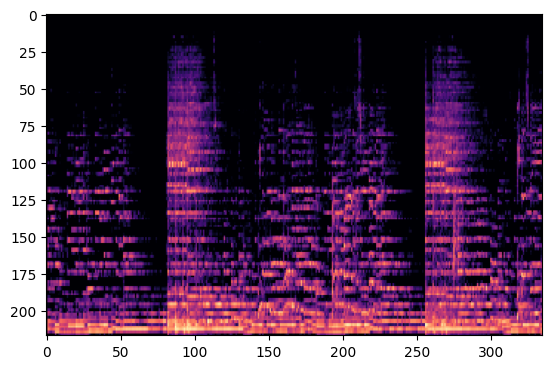

In [3]:
# shape of cropped image
img = cv2.imread(output_filename)  
print(img.shape)
# display cropped image
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('on')
plt.show()


In [4]:
import os
import cv2
import numpy as np
input_dir = 'E:\\Aditya\\IIT_Hyderabad\\Assignments\\Deep Learning\\Project\\Data\\images_cropped'
output_dir = 'E:\\Aditya\\IIT_Hyderabad\\Assignments\\Deep Learning\\Project\\Data\\images_cropped_vertical'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define the desired dimensions for the cropped images
crop_height = 217
crop_width = 50

# Define the overlap percentage
overlap = 0.3

# Iterate over the cropped images
for genre_folder in os.listdir(input_dir):
    genre_path = os.path.join(input_dir, genre_folder)
    if not os.path.isdir(genre_path):
        continue 
    
    output_genre_path = os.path.join(output_dir, genre_folder)
    if not os.path.exists(output_genre_path):
        os.makedirs(output_genre_path)

    for filename in os.listdir(genre_path):
        img_path = os.path.join(genre_path, filename)
        img = cv2.imread(img_path)
        if img is None:
            continue
        
        img_height, img_width, _ = img.shape

        # Calculate the number of vertical cuts
        num_cuts = int((img_width - crop_width) / (crop_width * overlap)) + 1

        # Crop and save the vertical cuts
        for i in range(num_cuts):
            start_x = int(i * crop_width * overlap)
            end_x = int(start_x + crop_width)
            cropped_img = img[:, start_x:end_x, :]

            output_filename = os.path.join(output_genre_path, f'{filename}_{i}.png')
            cv2.imwrite(output_filename, cropped_img)
